<a href="https://colab.research.google.com/github/CaptaiN785/Maleria-detection/blob/main/maleria_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import joblib
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import vgg19


In [3]:
file = zipfile.ZipFile("Dataset.zip")
file.extractall()
file.close()

In [4]:
train_dir = "/content/Dataset/Train"
test_dir = "/content/Dataset/Test"

In [5]:
## There is two category
par = 'Parasite'
non_par = "Uninfected"

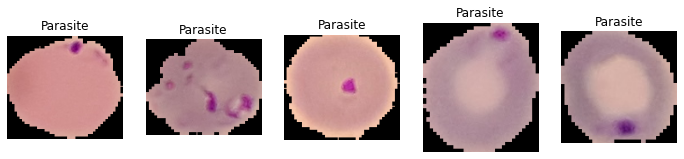

In [6]:
## Plotting the some images of these category

## Category is parasite

category = par
cate_path = os.path.join(train_dir, category)
plt.figure(figsize=(12, 6))
for i, img_name in enumerate(os.listdir(cate_path)[:5]):
    plt.subplot(1, 5, i+1)
    img = plt.imread(os.path.join(cate_path, img_name)) 
    plt.imshow(img)
    plt.axis("off")
    plt.title(category)
plt.show()

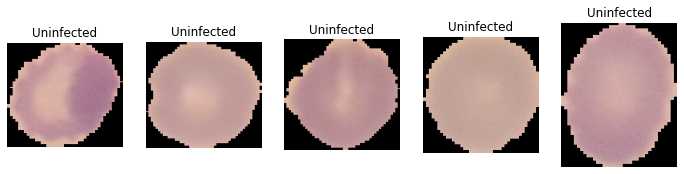

In [7]:
## Category is non parasite

category = non_par
cate_path = os.path.join(train_dir, category)
plt.figure(figsize=(12, 6))
for i, img_name in enumerate(os.listdir(cate_path)[:5]):
    plt.subplot(1, 5, i+1)
    img = plt.imread(os.path.join(cate_path, img_name)) 
    plt.imshow(img)
    plt.axis("off")
    plt.title(category)
plt.show()

In [8]:
## Finding the total image for training set
images = glob(train_dir+"/*/*", recursive=True)
len(images)

416

In [9]:
## Checking the testing set
test_image = glob(test_dir + "/*/*")
len(test_image)

134

In [58]:
## Creating the data generator

train_gen = ImageDataGenerator(
    rescale = 1.0/255.0,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2
)

test_gen = ImageDataGenerator(
    rescale=1.0/255.0
)

In [59]:
## Generating the training and testing set

## Defining some parameters
batch_size = 16
st_per_ep = len(images)/batch_size
val_step = len(test_image)/batch_size

train_set = train_gen.flow_from_directory(
    train_dir,
    target_size=(96, 96),
    class_mode = 'binary',
    batch_size = batch_size
)
test_set = test_gen.flow_from_directory(
    test_dir,
    target_size=(96, 96),
    class_mode = 'binary',
    batch_size=batch_size
)

Found 416 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [67]:
## Designing the model

model = models.Sequential([
    layers.Input(shape=(96, 96, 3)),
    layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', activation='relu'),
    layers.Conv2D(64, (5, 5), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), padding = "same", activation = 'relu'),
    layers.Conv2D(128, (3, 3), padding = "same", activation = 'relu'),
    layers.Conv2D(128, (3, 3), padding = "same", activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(256, (3, 3), activation = 'relu', padding = "same"),
    layers.Conv2D(256, (3, 3), activation = 'relu', padding = "same"),
    layers.Conv2D(256, (3, 3), activation = 'relu', padding = "same"),
    layers.Conv2D(256, (3, 3), activation = 'relu', padding = "same"),
    layers.Conv2D(256, (3, 3), activation = 'relu', padding = "same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 48, 48, 64)        4864      
                                                                 
 conv2d_51 (Conv2D)          (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization_15 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_52 (Conv2D)          (None, 24, 24, 128)      

In [68]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate = 0.0001)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [69]:
history = model.fit(
    train_set, 
    steps_per_epoch=st_per_ep,
    validation_data = test_set,
    validation_steps=val_step,
    epochs = 100
)

Epoch 1/100
26/26 [==============================] - 3s 76ms/step - loss: 1.0900 - accuracy: 0.4880 - val_loss: 0.7093 - val_accuracy: 0.3209
Epoch 2/100
26/26 [==============================] - 2s 68ms/step - loss: 0.7944 - accuracy: 0.5986 - val_loss: 0.7129 - val_accuracy: 0.3209
Epoch 3/100
26/26 [==============================] - 2s 69ms/step - loss: 0.5732 - accuracy: 0.7284 - val_loss: 0.7053 - val_accuracy: 0.3209
Epoch 4/100
26/26 [==============================] - 2s 66ms/step - loss: 0.5492 - accuracy: 0.7139 - val_loss: 0.6909 - val_accuracy: 0.5970
Epoch 5/100
26/26 [==============================] - 2s 67ms/step - loss: 0.4696 - accuracy: 0.7837 - val_loss: 0.7223 - val_accuracy: 0.3209
Epoch 6/100
26/26 [==============================] - 2s 68ms/step - loss: 0.5547 - accuracy: 0.7548 - val_loss: 0.7047 - val_accuracy: 0.4104
Epoch 7/100
26/26 [==============================] - 2s 68ms/step - loss: 0.4802 - accuracy: 0.7837 - val_loss: 0.7347 - val_accuracy: 0.3881
Epoch 

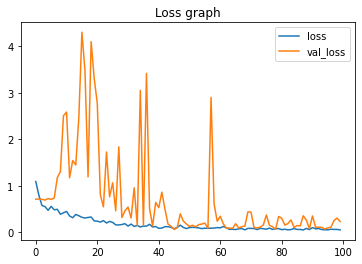

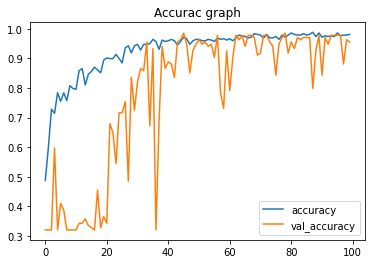

In [100]:
## Plottting the history

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss graph")
plt.legend(['loss', 'val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accurac graph")
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [18]:
## Building the function for predicting the images
import cv2 as cv

In [71]:
img_path = "/content/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_10.png"
par_img = cv.imread(img_path)
par_img.shape

(115, 124, 3)

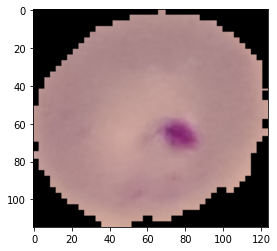

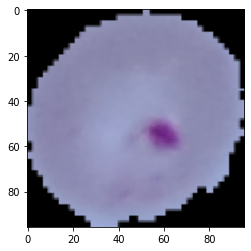

In [101]:
img_rgb = cv.cvtColor(par_img,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()
img_rgb = cv.resize(par_img, (96, 96))
plt.imshow(img_rgb)
plt.show()

In [102]:
img = np.expand_dims(img_rgb, 0)

In [103]:
model.predict(img)

array([[0.]], dtype=float32)

In [98]:
train_set.class_indices

{'Parasite': 0, 'Uninfected': 1}

In [119]:
def Predict(image_path):
    images = []
    corrupted_index = []
    for i, img_path in enumerate(image_path):
        try:
            img = cv.imread(img_path)
            img = cv.resize(img, (96, 96), interpolation=cv.INTER_AREA)/255.0
            images.append(img)
        except:
            corrupted_index.append(i)
    images = np.array(images)
    print("Shape of array is : ", images.shape)
    result = model.predict(images)
    return {"result":np.round(result[:, 0]), "error_index":corrupted_index}

In [116]:
par_dir = os.path.join(test_dir, par)
par_images = os.listdir(par_dir)

par_dirs = []
for img_name in par_images:
    par_dirs.append(os.path.join(par_dir, img_name))

non_par_dir = os.path.join(test_dir, non_par)
non_par_images = os.listdir(non_par_dir)

non_par_dirs = []
for img_name in non_par_images:
    non_par_dirs.append(os.path.join(non_par_dir, img_name))


In [124]:
result = Predict(par_dirs)

Shape of array is :  (91, 96, 96, 3)


In [125]:
result['result'], result['error_index']

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0.], dtype=float32), [])

In [129]:
1 - (result['result'].sum()/len(par_dirs))
## 97% accuracy is achived in case of having Parasite

0.978021978021978

In [130]:
result = Predict(non_par_dirs)

Shape of array is :  (43, 96, 96, 3)


In [135]:
result['result'].sum()/len(non_par_dirs)
## 83% accuracy is achived in case of not having Parasite

0.8372093023255814

In [136]:
## Which is a good model

In [150]:
def Predict_One(image_path):

    label = {0:"Parasite", 1:"Uninfected"}

    img = cv.imread(image_path)
    img = cv.resize(img, (96, 96), interpolation=cv.INTER_AREA)/255.0
    img = np.expand_dims(img, 0)

    print("Shape of array is : ", img.shape)
    result = model.predict(img)
    return label[np.round(result[0][0])]

In [151]:
Predict_One("/content/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_13.png")

Shape of array is :  (1, 96, 96, 3)


'Parasite'

In [152]:
Predict_One("/content/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_163002_cell_159.png")

Shape of array is :  (1, 96, 96, 3)


'Uninfected'

In [153]:
import joblib
joblib.dump(model, open("parasite.pkl", 'wb'))

In [158]:
## Trying using the saved model
md = joblib.load(open("parasite.pkl", 'rb'))

In [159]:
def Predict_One_saved(image_path):

    label = {0:"Parasite", 1:"Uninfected"}

    img = cv.imread(image_path)
    img = cv.resize(img, (96, 96), interpolation=cv.INTER_AREA)/255.0
    img = np.expand_dims(img, 0)

    print("Shape of array is : ", img.shape)
    result = md.predict(img)
    return label[np.round(result[0][0])]

In [160]:
Predict_One_saved("/content/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_13.png")

Shape of array is :  (1, 96, 96, 3)


'Parasite'

In [161]:
Predict_One_saved("/content/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_163002_cell_159.png")

Shape of array is :  (1, 96, 96, 3)


'Uninfected'